<a href="https://colab.research.google.com/github/bhanu151/becoming_a_reflective_information_scientist_2026/blob/main/Fun_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns

Upload a grayscale image, which has no color


In [77]:
from google.colab import files
uploaded = files.upload()

Saving 5-black-white-secrets.jpg to 5-black-white-secrets (1).jpg


Let's display this as a grayscale image

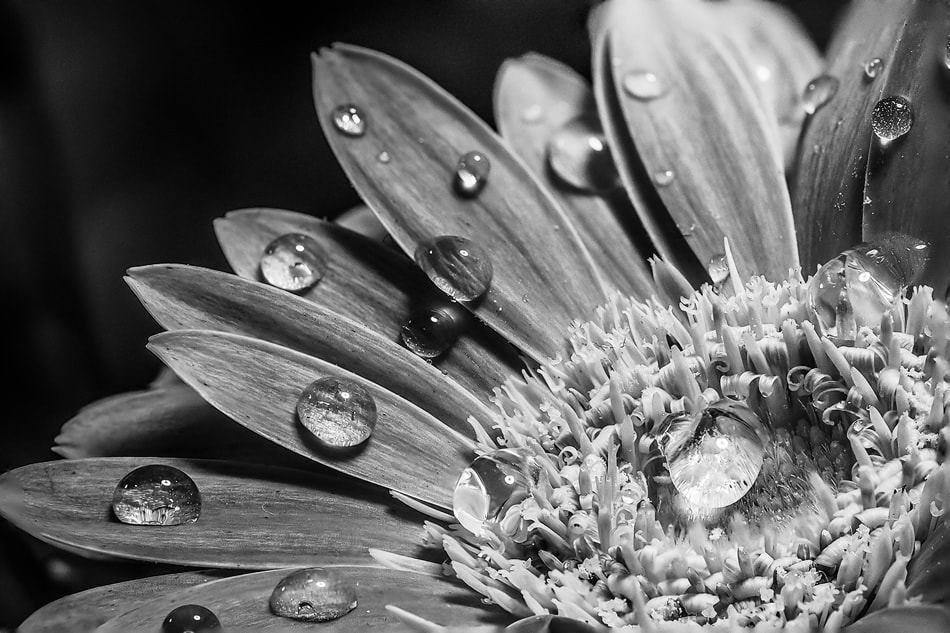

In [78]:
grayscale_img = Image.open(list(uploaded.keys())[0]).convert("L")
display(grayscale_img)

Let's visualize the pixels in this grayscale image

In [79]:
g_arr = np.array(grayscale_img)
print(g_arr.shape)
print(g_arr)

(633, 950)
[[ 7  8  8 ... 64 65 65]
 [ 7  7  8 ... 56 62 66]
 [ 6  7  7 ... 52 64 73]
 ...
 [45 43 42 ... 80 78 76]
 [56 53 49 ... 79 77 75]
 [74 62 61 ... 83 81 80]]


Let's plot the histogram of the intensity values of the pixels in the image

Text(0, 0.5, 'Counts')

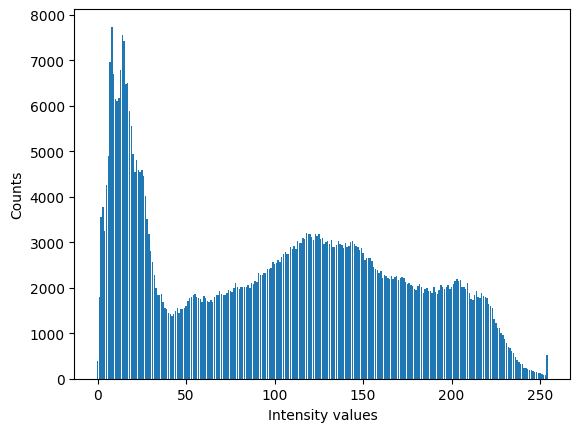

In [80]:
g_hist_counts, g_hist_bins = np.histogram(g_arr, bins=np.arange(0,256))
plt.bar(g_hist_bins[:-1], g_hist_counts)
plt.xlabel("Intensity values")
plt.ylabel("Counts")

Let's try increasing the brightness of this image

array([[107, 108, 108, ..., 164, 165, 165],
       [107, 107, 108, ..., 156, 162, 166],
       [106, 107, 107, ..., 152, 164, 173],
       ...,
       [145, 143, 142, ..., 180, 178, 176],
       [156, 153, 149, ..., 179, 177, 175],
       [174, 162, 161, ..., 183, 181, 180]], dtype=uint8)
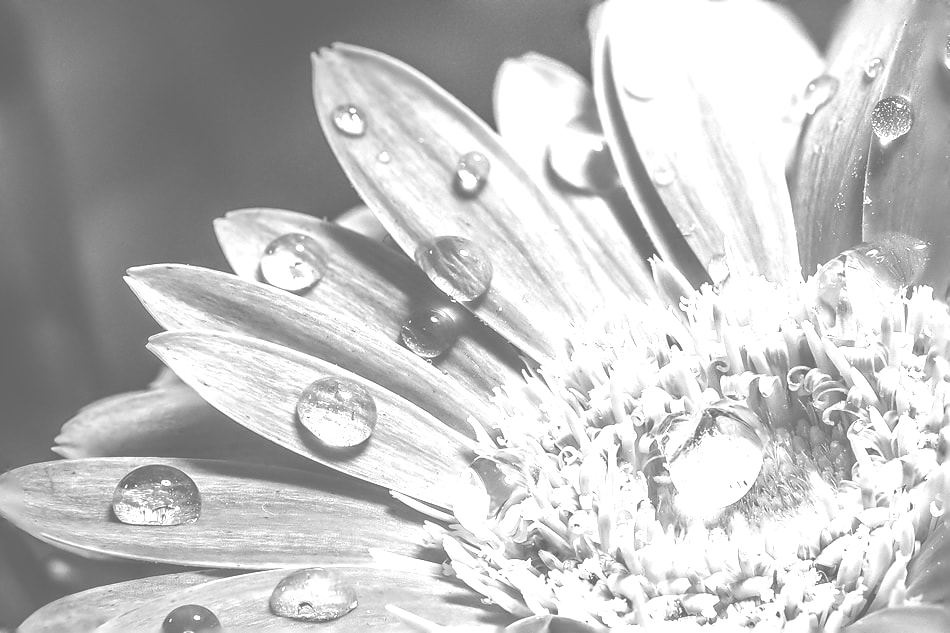

In [81]:
brightness_increment_value = 100
g_arr_int16 = g_arr.astype(np.int16)
g_arr_int16 += brightness_increment_value
g_arr_brightness_modified = np.clip(g_arr_int16, 0, 255).astype(np.uint8)
display(g_arr_brightness_modified)

Let's plot the  new histogram of the intensity values of the pixels in the image after changing the brightness

Text(0, 0.5, 'Counts')

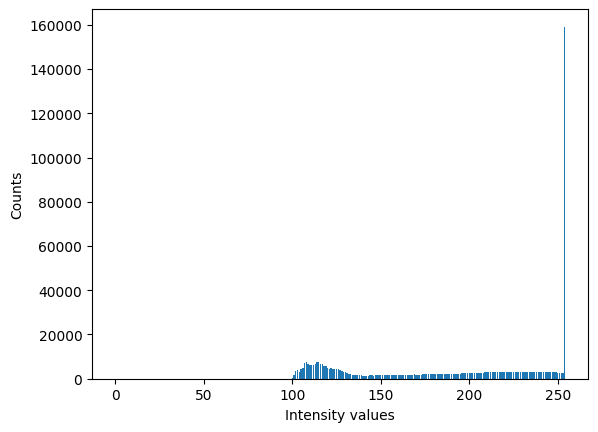

In [82]:
g_hist_counts, g_hist_bins = np.histogram(g_arr_brightness_modified, bins=np.arange(0,256))
plt.bar(g_hist_bins[:-1], g_hist_counts)
plt.xlabel("Intensity values")
plt.ylabel("Counts")

Let's try increasing the contrast of this image

array([[ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  4],
       [ 0,  0,  0, ...,  0,  0, 18],
       ...,
       [ 0,  0,  0, ..., 32, 28, 24],
       [ 0,  0,  0, ..., 30, 26, 22],
       [20,  0,  0, ..., 38, 34, 32]], dtype=uint8)
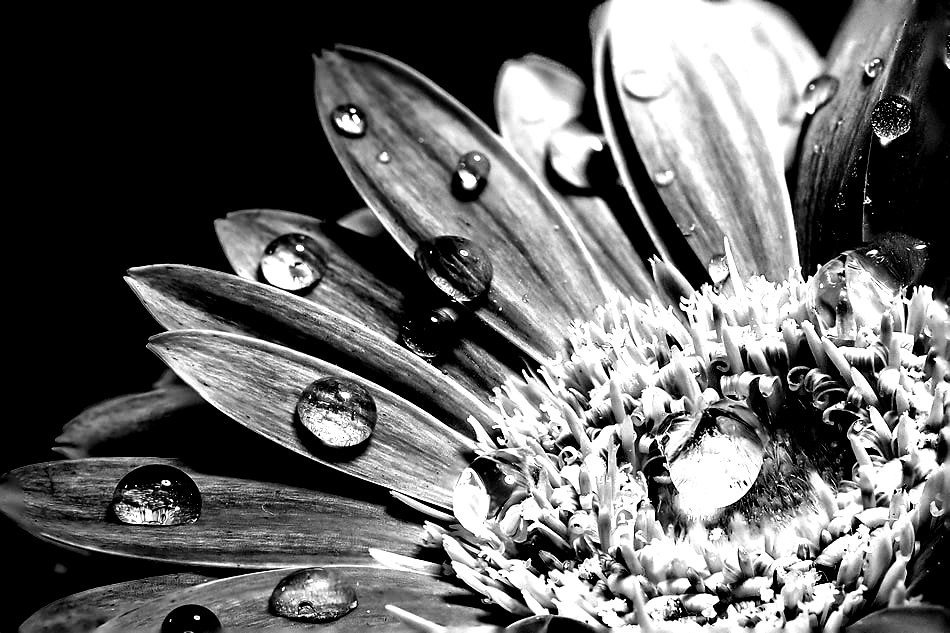

In [83]:
scale_factor = 2
g_arr_int16 = g_arr.astype(np.float64)
g_arr_int16 = (g_arr_int16 - 128) *scale_factor + 128
g_arr_contrast_enhanced = np.clip(g_arr_int16, 0, 255).astype(np.uint8)
display(g_arr_contrast_enhanced)

Let's plot the  new histogram of the intensity values of the pixels in the image after changing the contrast

Text(0, 0.5, 'Counts')

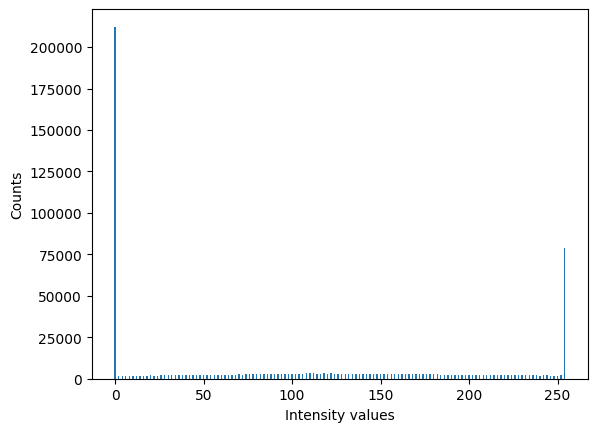

In [84]:
g_hist_counts, g_hist_bins = np.histogram(g_arr_contrast_enhanced, bins=np.arange(0,256))
plt.bar(g_hist_bins[:-1], g_hist_counts)
plt.xlabel("Intensity values")
plt.ylabel("Counts")

## Filters

Let's do some edge detection on the grayscale image

In [85]:
Kx = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])

Ky = np.array([[ 1,  1,  1],
               [ 0,  0,  0],
               [-1, -1, -1]])

In [86]:
def convolve2d(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    out = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            out[i, j] = np.sum(region * kernel)
    return out

gx = convolve2d(g_arr, Kx)
gy = convolve2d(g_arr, Ky)

edges = np.sqrt(gx**2 + gy**2)

(np.float64(-0.5), np.float64(949.5), np.float64(632.5), np.float64(-0.5))

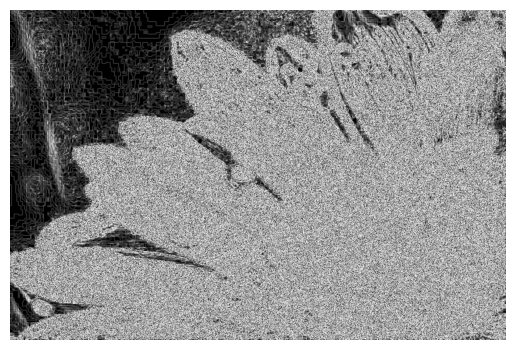

In [87]:
edges = (edges / edges.max() * 255).astype(np.uint8)

plt.imshow(edges, cmap="gray")
plt.axis("off")

Let's try blurring the image

(np.float64(-0.5), np.float64(949.5), np.float64(632.5), np.float64(-0.5))

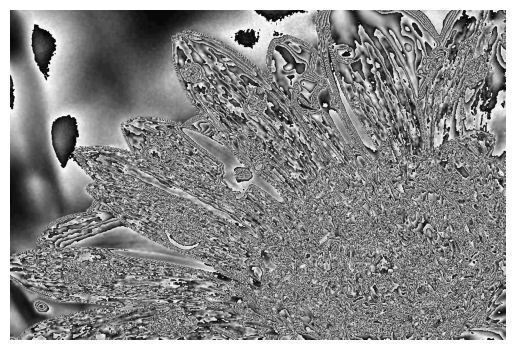

In [97]:
box_kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]])

blurred = convolve2d(g_arr, box_kernel)
plt.imshow(blurred, cmap="gray")
plt.axis("off")

# Color images

In [90]:
from google.colab import files
uploaded = files.upload()

Saving kingfisher.jpg to kingfisher (1).jpg


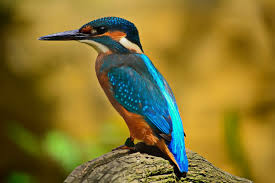

In [91]:
img = Image.open(list(uploaded.keys())[0])
display(img)

Let's visualize the pixels

(183, 275, 3)
[[ 82  83  85 ... 155 155 155]
 [ 78  81  84 ... 153 153 153]
 [ 75  76  81 ... 151 151 151]
 ...
 [ 28  28  28 ... 155 155 155]
 [ 28  29  29 ... 154 154 154]
 [ 29  30  29 ... 154 154 154]]


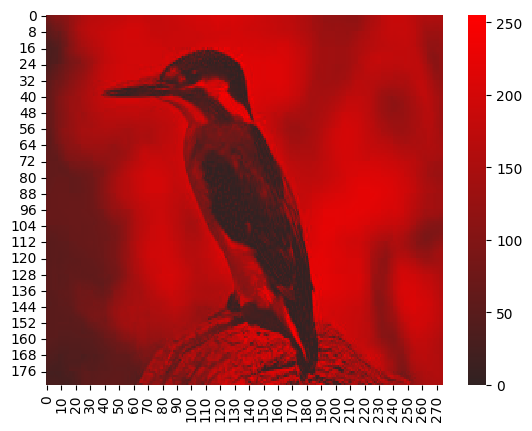

In [92]:
color_dict = {"red": 0, "green":1, "blue":2}
color_choice = "red"
arr = np.array(img)
print(arr.shape)
sns.heatmap(arr[:,:,color_dict[color_choice]], cmap=sns.dark_palette(color=color_choice, as_cmap=True)) # Visualizing the reds/blues or greens; 0=red, 1=green, 2-blue;
print(arr[:,:,color_dict[color_choice]])

Let's add some redness to the image

array([[[255,  74,  11],
        [255,  75,  12],
        [255,  77,  12],
        ...,
        [255, 120,  28],
        [255, 120,  28],
        [255, 120,  28]],

       [[255,  72,  10],
        [255,  73,  10],
        [255,  76,  13],
        ...,
        [255, 118,  28],
        [255, 118,  28],
        [255, 118,  28]],

       [[255,  69,   9],
        [255,  70,   8],
        [255,  73,  11],
        ...,
        [255, 116,  26],
        [255, 116,  26],
        [255, 116,  26]],

       ...,

       [[255,  16,   2],
        [255,  16,   0],
        [255,  20,   1],
        ...,
        [255, 119,  33],
        [255, 119,  33],
        [255, 119,  33]],

       [[255,  16,   2],
        [255,  17,   1],
        [255,  21,   2],
        ...,
        [255, 118,  32],
        [255, 118,  32],
        [255, 118,  32]],

       [[255,  17,   3],
        [255,  18,   2],
        [255,  21,   2],
        ...,
        [255, 118,  32],
        [255, 118,  32],
        [255, 118,  32]]], dtype=uint8)
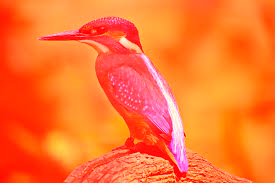

[[[255  74  11]
  [255  75  12]
  [255  77  12]
  ...
  [255 120  28]
  [255 120  28]
  [255 120  28]]

 [[255  72  10]
  [255  73  10]
  [255  76  13]
  ...
  [255 118  28]
  [255 118  28]
  [255 118  28]]

 [[255  69   9]
  [255  70   8]
  [255  73  11]
  ...
  [255 116  26]
  [255 116  26]
  [255 116  26]]

 ...

 [[255  16   2]
  [255  16   0]
  [255  20   1]
  ...
  [255 119  33]
  [255 119  33]
  [255 119  33]]

 [[255  16   2]
  [255  17   1]
  [255  21   2]
  ...
  [255 118  32]
  [255 118  32]
  [255 118  32]]

 [[255  17   3]
  [255  18   2]
  [255  21   2]
  ...
  [255 118  32]
  [255 118  32]
  [255 118  32]]]


In [93]:
arr_r = arr.copy()
arr_r[:,:,0] = 255
display(arr_r)
print(arr_r)